<a href="https://colab.research.google.com/github/ancientpi3/Fellowship2022/blob/main/discriminator_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot
from google.colab.patches import cv2_imshow
import cv2

In [166]:
#probabilistic generator parameters
mean = .0
scale = .2

#model meta parameters
lr = .0005

In [44]:
def generated_image(mean, stddev, minval, maxval):
  return np.clip(np.random.normal(loc=mean, scale=stddev,size=(28,28)), minval, maxval)

In [178]:
def zoom(img, zoom_factor=1.5):
    return cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor,interpolation=0)

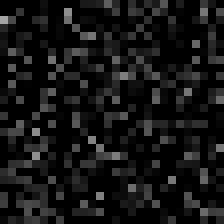

In [179]:
test = generated_image(mean,scale,0,1)
cv2_imshow(zoom(test*255,8))

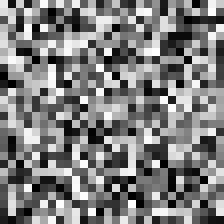

In [180]:
test2 = np.random.rand(28,28)
cv2_imshow(zoom(test2*255,8))

In [181]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
  model = Sequential()
  model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape, activation='relu'))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  opt = Adam(learning_rate=lr, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [182]:
def generate_data(mean=0, scale=.2, data_size = 100):
  data = []
  labels = []
  for _ in range(data_size):
    data.append(generated_image(mean,scale,0,1))
    labels.append(0)
    data.append(np.random.rand(28,28))
    labels.append(1)
  return (np.array(labels),np.array(data))

In [183]:
def plot_history(history):
  pyplot.plot(history.history['accuracy'])
  pyplot.plot(history.history['val_accuracy'])
  pyplot.title('model accuracy')
  pyplot.ylabel('accuracy')
  pyplot.xlabel('epoch')
  pyplot.legend(['train'], loc='upper left')
  pyplot.show()

In [184]:
labels,data = generate_data()
valid_labels, valid_data = generate_data(mean=.2,scale=.3,data_size=50)

In [185]:
model = define_discriminator()
model.build(input_shape = (28,28,1))
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 flatten_28 (Flatten)        (None, 12544)             0         
                                                                 
 dense_28 (Dense)            (None, 1)                 12545     
                                                                 
Total params: 13,185
Trainable params: 13,185
Non-trainable params: 0
_________________________________________________________________


In [186]:
model = define_discriminator()
model.build(input_shape = (28,28,1))
history = model.fit(x = data, y = labels, epochs=10, validation_data=(valid_data,valid_labels))

Epoch 1/10
7/7 [==============================] - 1s 33ms/step - loss: 0.6106 - accuracy: 0.5200 - val_loss: 0.6479 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.4973 - accuracy: 0.5000 - val_loss: 0.6375 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 0s 13ms/step - loss: 0.4062 - accuracy: 0.7900 - val_loss: 0.5600 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2816 - accuracy: 1.0000 - val_loss: 0.4308 - val_accuracy: 0.5100
Epoch 5/10
7/7 [==============================] - 0s 13ms/step - loss: 0.1600 - accuracy: 1.0000 - val_loss: 0.3788 - val_accuracy: 0.6700
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.0858 - accuracy: 1.0000 - val_loss: 0.3324 - val_accuracy: 0.9100
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0491 - accuracy: 1.0000 - val_loss: 0.2803 - val_accuracy: 1.0000
Epoch 8/10
7/7 [===========

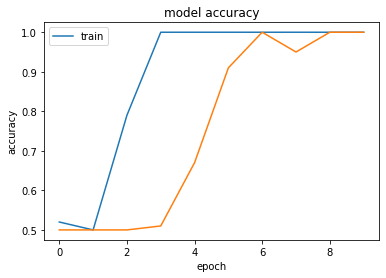

In [187]:
plot_history(history)